# Acesso à Internet e TV - André Annunziato - 2A
### A ideia do meu projeto é verificar o crescimento do uso da internet e tv nos estados do Nordeste baseado na renda e na quantidade de pessoas por residência, e verificar como elas se relacionam ao longo do tempo, além dos aparelhos (telefone celular, TV, computador) e redes (banda larga ou 3G) utilizados.

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
matplotlib.style.use('ggplot')


import os
pd.options.mode.chained_assignment = None
meu_diretorio = "/Users/andre/Desktop/Insper/2 SEMESTRE/Ciência dos Dados/PROJETO 1/2015"
os.chdir(meu_diretorio)

dados = pd.read_csv("DOM2015.csv")

tabela = dados.loc[:,["UF","V0105","V0202","V0220","V02322","V02323","V02325","V02326","V02424","V02426","V4621"]]

tabela = tabela[pd.notnull(dados.UF) & pd.notnull(dados.V0105) & pd.notnull(dados.V0202) & pd.notnull(dados.V0220) & pd.notnull(dados.V02322) & pd.notnull(dados.V02323) & pd.notnull(dados.V02325) & pd.notnull(dados.V02326) & pd.notnull(dados.V02424) & pd.notnull(dados.V02426) &  pd.notnull(dados.V4621)]

tabela = tabela[(dados.UF>=21) & (dados.UF<=29)]

tabela.UF = tabela.UF.astype('category')
tabela.V0105 = tabela.V0105.astype('int')
tabela.V0202 = tabela.V0202.astype('category')
tabela.V0220 = tabela.V0220.astype('category')
tabela.V02322 = tabela.V02322.astype('category')
tabela.V02323 = tabela.V02323.astype('category')
tabela.V02325 = tabela.V02325.astype('category')
tabela.V02326 = tabela.V02326.astype('category')
tabela.V02424 = tabela.V02424.astype('category')
tabela.V02426 = tabela.V02426.astype('category')
tabela.V4621 = tabela.V4621.astype('float')


tabela.UF.cat.categories = ("MA","PI","CE","RN","PB","PE","AL","SE","BA")
tabela.V0202.cat.categories = ("Casa","Apartamento","Cômodo")
tabela.V0220.cat.categories = ("Sim","Não")
tabela.V02322.cat.categories = ("Sim")
tabela.V02323.cat.categories = ("Sim","Não")
tabela.V02325.cat.categories = ("Sim","Não")
tabela.V02326.cat.categories = ("Sim","Não")
tabela.V02424.cat.categories = ("Sim","Não")
tabela.V02426.cat.categories = ("Sim","Não")


tabela.columns = ["UF","N° de moradores","Tipo de domicílio","Telefone móvel","Internet em casa","Acesso por PC","Acesso por tablet","Acesso por TV", "Acesso por 3G/4G","Acesso por banda larga", "Renda per capita"]

tabela.to_csv("Resumo.csv")
tabela

C:\Users\andre\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,UF,N° de moradores,Tipo de domicílio,Telefone móvel,Internet em casa,Acesso por PC,Acesso por tablet,Acesso por TV,Acesso por 3G/4G,Acesso por banda larga,Renda per capita
21444,MA,5,Casa,Sim,Sim,Não,Não,Não,Sim,Não,436.0
21448,MA,7,Casa,Sim,Sim,Não,Não,Não,Sim,Não,187.0
21451,MA,1,Casa,Sim,Sim,Não,Não,Não,Sim,Não,1900.0
21452,MA,2,Casa,Sim,Sim,Sim,Não,Não,Não,Sim,2295.0
21455,MA,5,Casa,Sim,Sim,Não,Sim,Não,Sim,Não,680.0
21456,MA,2,Casa,Sim,Sim,Não,Não,Não,Sim,Não,383.0
21466,MA,5,Casa,Sim,Sim,Não,Não,Não,Sim,Não,1059.0
21467,MA,6,Casa,Sim,Sim,Não,Não,Não,Sim,Não,453.0
21484,MA,5,Casa,Sim,Sim,Não,Não,Não,Sim,Não,561.0
21485,MA,4,Casa,Sim,Sim,Não,Não,Não,Sim,Não,702.0


In [2]:
pc = tabela["Acesso por PC"].value_counts()
pc

Sim    9498
Não    6546
Name: Acesso por PC, dtype: int64

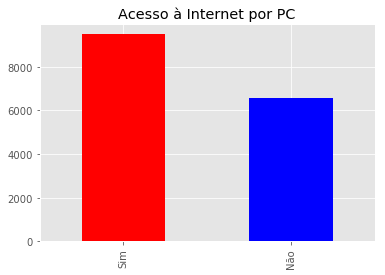

In [3]:
pc.plot(kind='bar', color=('red', 'blue'), legend=False)
plt.title("Acesso à Internet por PC")

In [4]:
acesso = pd.crosstab(tabela["Acesso por 3G/4G"], tabela["Acesso por banda larga"])
acesso

Acesso por banda larga,Sim,Não
Acesso por 3G/4G,,
Sim,5680,5236
Não,5091,37


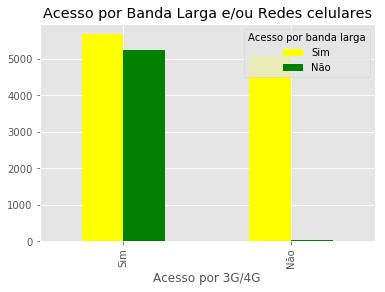

In [5]:
acesso.plot(kind='bar',color=('yellow','green'))
plt.title("Acesso por Banda Larga e/ou Redes celulares")

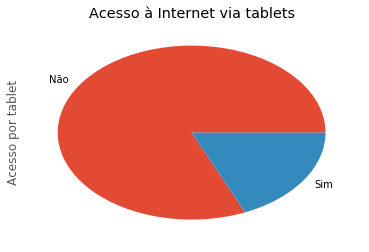

In [6]:
tablet = tabela["Acesso por tablet"].value_counts()
tablet.plot(kind='pie')
plt.title("Acesso à Internet via tablets")

In [7]:
tabela = tabela[tabela["Renda per capita"]!=999999999999]

tabela["Renda per capita"].describe()



count    15870.000000
mean      1128.647385
std       1735.482211
min          0.000000
25%        390.000000
50%        650.000000
75%       1166.000000
max      40380.000000
Name: Renda per capita, dtype: float64

In [13]:
faixa = np.arange(0,10000,10)
renda = pd.cut(tabela["Renda per capita"],faixa)
renda.value_counts()

(390, 400]      603
(780, 790]      396
(260, 270]      348
(590, 600]      320
(520, 530]      303
(490, 500]      301
(990, 1000]     291
(190, 200]      251
(290, 300]      233
(690, 700]      199
(660, 670]      187
(790, 800]      179
(430, 440]      167
(310, 320]      165
(440, 450]      163
(230, 240]      162
(1490, 1500]    161
(330, 340]      158
(420, 430]      152
(240, 250]      149
(540, 550]      146
(740, 750]      145
(640, 650]      142
(890, 900]      142
(470, 480]      135
(280, 290]      135
(560, 570]      134
(1190, 1200]    133
(370, 380]      133
(360, 370]      130
               ... 
(6620, 6630]      0
(6900, 6910]      0
(6750, 6760]      0
(6880, 6890]      0
(6860, 6870]      0
(6850, 6860]      0
(6830, 6840]      0
(3420, 3430]      0
(6820, 6830]      0
(6810, 6820]      0
(3480, 3490]      0
(6780, 6790]      0
(6770, 6780]      0
(6760, 6770]      0
(3550, 3560]      0
(3580, 3590]      0
(6630, 6640]      0
(3600, 3610]      0
(6720, 6730]      0


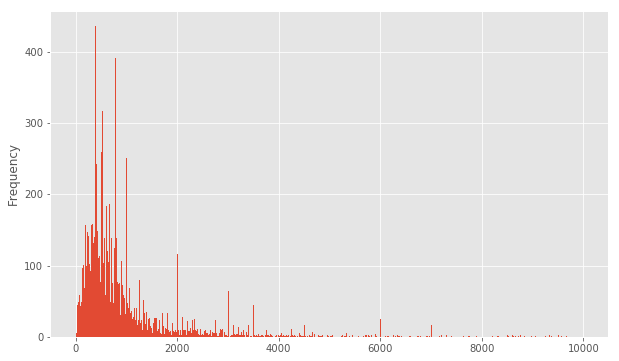

In [18]:
plot = tabela["Renda per capita"].plot.hist(bins=faixa, normed = False,figsize=(10,6))